# CMPT 423/820
## Assignment 4 Question 3
* Your Name
* Your student number
* Your NSID

The task in this notebook is to apply and compare two clustering methods: K-Means and Guassian Mixture Models to a simple dataset.  Since clustering is typically an unsupervised learning task, we'll start by admiring the clusters.  But the training data we'll use has a class label, so in our exercise, we'll strip the label, do the clustering, and then we'll be able to compare the clusters found to the true labels.  We'll do this visually.

To complete this question:
1.  Complete **Step 3**
1.  Complete **Step 4**
1.  Answer the questions below.
1.  Make a PDF of this notebook and submit your PDF to Moodle.


First some libraries...

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1
The ```a4q1.csv``` file is a copy of one of the data files we used earlier in the term.  It has 4 columns: ```index, x, y, L```, where ```L``` represents a label.  The ```x, y``` are continuous quantities, good for plotting in 2D.  We will only use ```L``` to colourize our figures.

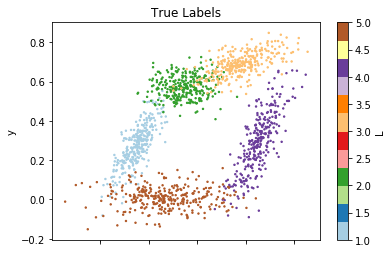

In [2]:
df = pd.read_csv('a4q3.csv', index_col=0)

# Plot the data with each label 'L' getting a different color

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

## Step 2
Now we'll strip off the labels, and set up some variables for use by the fitting methods.

In [3]:
# just the input features
X_df = df[['x', 'y']]

# just the labels.
L_df = df['L']

# the number of true classes in the data
n_classes = len(np.unique(L_df))

# the number of clusters to seek; experiment with this!
n_components = n_classes

## Step 3
Fit the KMeans model to the features of the data set.

In [ ]:
from sklearn.cluster import KMeans

# create the model object
kmeans_estimator = KMeans(# go read the docs, and add information here
                    )

# fit on all the data
kmeans_estimator.fit(X_df)

## Step 4
Fit the GMM model to the features of the data set.

In [ ]:
from sklearn.mixture import GaussianMixture

# create the model object
gmm_estimator = GaussianMixture(# go read the docs, and add information here
                                )

# fit on all the data
gmm_estimator.fit(X_df)

## Step 5
Plot the centroids along with the labelled data.

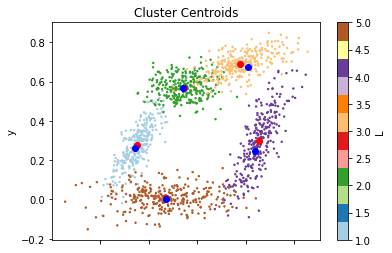

In [6]:
# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

## Questions
1.  The ```KMeans``` method allows us to indicate how the initial centroids are chosen:
  * ```init='k-means++'``` (this is the default behaviour)
  * ```init='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.  When you're done, return to the default behaviour for the next part.

2. The ```GMM``` method allows us to indicate how the initial centroids are chosen:
  * ```init_params='kmeans'``` (this is the default behaviour)
  * ```init_params='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.

## Answers
1.  *your answer here*

2. *your answer here*

### Grading: 12 marks
1. Step 3. 3 marks.
1. Step 4. 3 marks.
1. Answer to question 1 above (3 marks).
1. Answer to question 2 above (3 marks).